In [151]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
from google.colab import auth
auth.authenticate_user()

In [4]:
folder_path = '/content/gdrive/MyDrive/DLS/HW3/'
os.chdir(folder_path)

In [132]:
#libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

from tensorflow.keras.models import load_model
from tensorflow.keras.models import clone_model
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, InputLayer, Dense, Flatten, LSTM, Dropout, GRU

Q1.

a.

In [6]:
#train test set
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
X_train = X_train.reshape(-1, (28*28))
X_test = X_test.reshape(-1, (28*28))

In [9]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [10]:
initializer = tf.keras.initializers.HeNormal()

model = tf.keras.Sequential([
                  tf.keras.layers.Input(shape = (784,)),
                  tf.keras.layers.Flatten(),
                  tf.keras.layers.Dense(1024, activation = 'relu' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(1024, activation = 'relu' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(1024, activation = 'relu' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(1024, activation = 'relu' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(1024, activation = 'relu' , kernel_initializer = initializer),
                  tf.keras.layers.Dense(10, activation ='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 10)                1

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
#fit model
model.compile(optimizer = "Adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_baseline = model.fit(X_train, y_train, batch_size = 64, epochs = 50, validation_split = 0.2 )

Epoch 1/50
750/750 [==============================] - 7s 6ms/step - loss: 0.2427 - accuracy: 0.9286 - val_loss: 0.1418 - val_accuracy: 0.9591
Epoch 2/50
750/750 [==============================] - 4s 6ms/step - loss: 0.1151 - accuracy: 0.9687 - val_loss: 0.1343 - val_accuracy: 0.9628
Epoch 3/50
750/750 [==============================] - 5s 6ms/step - loss: 0.0864 - accuracy: 0.9769 - val_loss: 0.1209 - val_accuracy: 0.9680
Epoch 4/50
750/750 [==============================] - 5s 6ms/step - loss: 0.0654 - accuracy: 0.9820 - val_loss: 0.1331 - val_accuracy: 0.9698
Epoch 5/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0570 - accuracy: 0.9843 - val_loss: 0.1136 - val_accuracy: 0.9737
Epoch 6/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0569 - accuracy: 0.9852 - val_loss: 0.1491 - val_accuracy: 0.9688
Epoch 7/50
750/750 [==============================] - 5s 7ms/step - loss: 0.0485 - accuracy: 0.9876 - val_loss: 0.1202 - val_accuracy: 0.9753
Epoch 

In [ ]:
#save .h5 model
model.save('/content/gdrive/MyDrive/DLS/HW3/models/baseline.h5')

#save accuracies
data = {'Epoch': list(range(1, len(history_baseline.history['val_accuracy']) + 1)),
        'Training Accuracy' : history_baseline.history['accuracy'],
        'Validation Accuracy': history_baseline.history['val_accuracy']}
df = pd.DataFrame(data)

folder = '/content/gdrive/MyDrive/DLS/HW3/csv/'
csv_filename = 'baseline-q1.csv'
df.to_csv(folder + csv_filename, index=False)

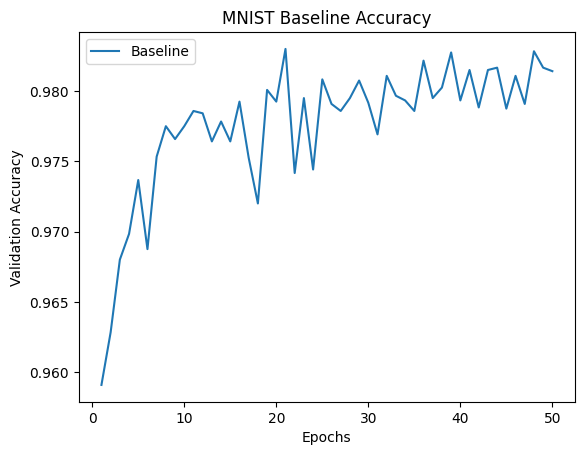

In [ ]:
#Plot the accuracies#plot the test accuracies
folder = '/content/gdrive/MyDrive/DLS/HW3/csv/'
csv_filename = 'baseline-q1.csv'
df = pd.read_csv(folder + csv_filename)

#plot the test accuracies from both DataFrames
plt.plot(df['Epoch'], df['Validation Accuracy'], label='Baseline')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('MNIST Baseline Accuracy')
plt.show()


In [68]:
#report test accuracy of baseline model
model = load_model('/content/gdrive/MyDrive/DLS/HW3/models/baseline.h5')
test_acc_baseline = model.evaluate(X_test , y_test)[1]
test_acc_baseline

313/313 [==============================] - 1s 2ms/step - loss: 0.1960 - accuracy: 0.9815


0.9815000295639038

In [63]:
#save the baseline parameters
model = load_model('/content/gdrive/MyDrive/DLS/HW3/models/baseline.h5')

for layer in model.layers:
    w = layer.get_weights()

In [64]:
#get weights for W(0) to W(5)
weights = []
for layer in model.layers[1:-1]:
  #print(layer.get_weights()[0].shape , layer.get_weights()[1].shape)
  weights.append(layer.get_weights()[0])

In [12]:
#run svd once.
svd_tensors = [tf.linalg.svd(w) for w in weights]

In [65]:
#vary d from 10,20, 50, 100, 200, Dfull = 784 or Dfull = 1024 for other layers.
#6 svd networks

ranks = [10, 20, 50, 100, 200, 1024]

test_acc = []

params = []

for rank in ranks:
  approx_weights = []

  for i in range(len(weights)):
    #components of svd
    s, u, v = svd_tensors[i]

    #choose only d singular values
    if i == 0:
      d = min(rank, weights[i].shape[0])
    else:
      d = min(rank, weights[i].shape[1])

    #approximate singular value decomposition
    ud = u[:, :d]
    sd = tf.linalg.diag(s[:d])
    vd = tf.transpose(v[:, :d])

    #print(ud.shape, sd.shape , vd.shape)
    #print(u.shape, s.shape, v.shape)

    #approximate weights
    approx_weights.append(tf.matmul(ud, tf.matmul(sd, vd)))

  for i in range(len(approx_weights)):
    #get bias
    bias = model.layers[i+1].get_weights()[1]
    model.layers[i+1].set_weights([approx_weights[i] , bias])

  #evaluate test accuracy
  test_acc.append(model.evaluate(X_test, y_test)[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1960 - accuracy: 0.9815


In [66]:
for i in range(len(ranks)):
  print("Rank: ", ranks[i] , "Test Accuracy: ", test_acc[i])

Rank:  10 Test Accuracy:  0.12290000170469284
Rank:  20 Test Accuracy:  0.3352000117301941
Rank:  50 Test Accuracy:  0.8277999758720398
Rank:  100 Test Accuracy:  0.9696000218391418
Rank:  200 Test Accuracy:  0.9805999994277954
Rank:  1024 Test Accuracy:  0.9815000295639038


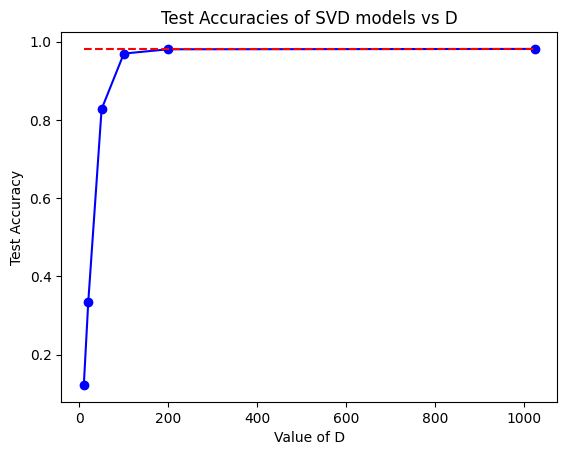

In [69]:
#find test accuracies of the 6 networks and compare with baseline.
#graph whose x-axis is D and y-axis is the test accuracy
plt.plot(ranks, test_acc, 'bo-')
plt.plot([ranks[0], ranks[-1]], [test_acc_baseline, test_acc_baseline], 'r--')
plt.xlabel('Value of D')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracies of SVD models vs D')
plt.show()

In [ ]:
#Number of parameters of your SVDed networks and compare them to the baseline’s.
for rank, cw in zip(ranks, params):
  print(f"Rank {rank} params: {cw} ")

Rank 10 params: 5012490 (100.0% of baseline)
Rank 20 params: 5012490 (100.0% of baseline)
Rank 50 params: 5012490 (100.0% of baseline)
Rank 100 params: 5012490 (100.0% of baseline)
Rank 200 params: 5012490 (100.0% of baseline)
Rank 1024 params: 5012490 (100.0% of baseline)


Since , here I have made changes in the baseline model, we can see that there are same number of parameters.

- However, if we make a new model and by the use of svd we can see that:
for every hidden dense layer in the base line model has 1024 x 1024 parameters = 1048576.

But when we use the parameters of derived from svd, we get u x s x d which for example for d = 10 will be

- u x s = 784 x 10 = 7840
- u x s x d = 10 x 1024 = 10240
- which gives us 7840 + 10240 = 18080 parameters which is 1.72% of one hidden dense layer of the baseline parameters.

Q2. Network Compression Using SVD.

In [114]:
#D = 20
model = load_model('/content/gdrive/MyDrive/DLS/HW3/models/baseline.h5')

In [115]:
#get weights for W(1) to W(5)
weights = []
for layer in model.layers[1:-1]:
  weights.append(layer.get_weights()[0])

In [123]:
#create a new model
rank = 20
model_rank = tf.keras.Sequential([
                  Input(shape = (784,)),
                  Flatten(),
                  Dense(rank, activation = 'relu', use_bias = False),
                  Dense(1024, activation = 'relu' , kernel_initializer = 'HeNormal' , use_bias = False),
                  Dense(rank, activation = 'relu' , use_bias = False),
                  Dense(1024, activation = 'relu' , kernel_initializer = 'HeNormal', use_bias = False),
                  Dense(rank, activation = 'relu' , use_bias = False),
                  Dense(1024, activation = 'relu' , kernel_initializer = 'HeNormal' , use_bias = False),
                  Dense(rank, activation = 'relu' , use_bias = False),
                  Dense(1024, activation = 'relu' , kernel_initializer = 'HeNormal' , use_bias = False),
                  Dense(rank, activation = 'relu' , use_bias = False),
                  Dense(1024, activation = 'relu' , kernel_initializer = 'HeNormal' , use_bias = False),
                  Dense(10, activation ='softmax')])

model_rank.compile(optimizer = "Adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_rank.summary()

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_68 (Flatten)        (None, 784)               0         
                                                                 
 dense_747 (Dense)           (None, 20)                15680     
                                                                 
 dense_748 (Dense)           (None, 1024)              20480     
                                                                 
 dense_749 (Dense)           (None, 20)                20480     
                                                                 
 dense_750 (Dense)           (None, 1024)              20480     
                                                                 
 dense_751 (Dense)           (None, 20)                20480     
                                                                 
 dense_752 (Dense)           (None, 1024)            

In [124]:
#run svd once.
svd_tensors = [tf.linalg.svd(w) for w in weights]

#d = 20

approx_weights = []
d = 20

model

for i in range(len(weights)):
  #components of svd
  s, u, v = svd_tensors[i]

  #approximate singular value decomposition
  ud = u[:, :d]
  sd = tf.linalg.diag(s[:d])
  vd = tf.transpose(v[:, :d])

  #initialise approximate weights
  #approx_weights.append(tf.matmul(ud, tf.matmul(sd, vd)))
  approx_weights.append([ud , sd , vd])

j = 0
i = 0

for i in range(1, 11):
  #print(i)
  ud , sd , vd = approx_weights[j]

  if i % 2 == 1:
    model_rank.layers[i].set_weights([ud])

  else:
    model_rank.layers[i].set_weights([tf.matmul(sd, vd)])
    j+=1

In [125]:
model_rank.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3128 - accuracy: 0.1271


[2.3128483295440674, 0.12710000574588776]

In [126]:
model_rank.compile(optimizer = Adam(learning_rate = 0.00001) , loss = "categorical_crossentropy" , metrics = ["accuracy"])
history_d20 = model_rank.fit(X_train, y_train, epochs = 50, batch_size = 32 , validation_data = [X_test, y_test] )

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9660 - accuracy: 0.2935 - val_loss: 1.7773 - val_accuracy: 0.3683
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6797 - accuracy: 0.4179 - val_loss: 1.5734 - val_accuracy: 0.4602
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.3977 - accuracy: 0.5468 - val_loss: 1.2790 - val_accuracy: 0.5877
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1513 - accuracy: 0.6682 - val_loss: 1.0626 - val_accuracy: 0.7113
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9606 - accuracy: 0.7466 - val_loss: 0.9089 - val_accuracy: 0.7728
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8210 - accuracy: 0.7930 - val_loss: 0.7895 - val_accuracy: 0.7940
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7027 - accuracy: 0.7875 - val_loss: 0.6696 - val_accuracy:

In [127]:
model_rank.save(f'/content/gdrive/MyDrive/DLS/HW3/models/svd-d20.h5')
test_acc_svd_d20 = model_rank.evaluate(X_test , y_test)[1]
test_acc_svd_d20

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1s 2ms/step - loss: 0.1510 - accuracy: 0.9610


0.9610000252723694

In [128]:
#save accuracies
data = {'Epoch': list(range(1, len(history_d20.history['val_accuracy']) + 1)),
        'Training Accuracy' : history_d20.history['accuracy'],
        'Validation Accuracy': history_d20.history['val_accuracy']}
df = pd.DataFrame(data)

folder = '/content/gdrive/MyDrive/DLS/HW3/csv/'
csv_filename = 'svd-d20-q2.csv'
df.to_csv(folder + csv_filename, index=False)

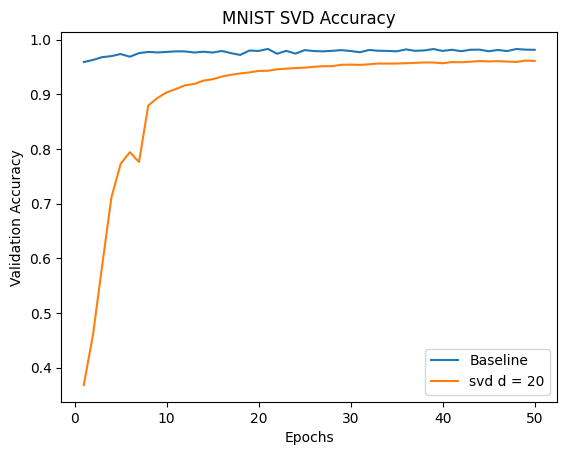

In [129]:
#Plot the accuracies#plot the test accuracies
folder = '/content/gdrive/MyDrive/DLS/HW3/csv/'
csv_filename1 = 'baseline-q1.csv'
df1 = pd.read_csv(folder + csv_filename1)
csv_filename2 = 'svd-d20-q2.csv'
df2 = pd.read_csv(folder + csv_filename2)

#plot the test accuracies from both DataFrames
plt.plot(df1['Epoch'], df1['Validation Accuracy'], label='Baseline')
plt.plot(df2['Epoch'], df2['Validation Accuracy'], label='svd d = 20')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('MNIST SVD Accuracy')
plt.show()


In [134]:
param_count = 0
param_count2 = 0

for layer in model_rank.layers:
  weights = layer.get_weights()
  param_count += sum([w.size for w in weights])

for layer in model.layers:
  weights = layer.get_weights()
  param_count2 += sum([w.size for w in weights])

print(f"Total Parameters of Compresed Network: {param_count}")
print(f"Total Parameters of Baseline Network: {param_count2}")
print(f"Parameters of d = 20 is: {param_count*100/param_count2}% of baseline parameters ")

Total Parameters of Compresed Network: 210250
Total Parameters of Baseline Network: 5012490
Parameters of d = 20 is: 4.194522083834581% of baseline parameters 


Q3

In [43]:
from tensorflow.keras.layers import Layer

class customlayer(Layer):
  def __init__(self, units = None, rank = None, kernel_initializer = None, bias_initializer = None):
    super(customlayer, self).__init__()
    self.units = units
    self.rank = rank
    self.kernel_initializer = kernel_initializer
    self.bias_initializer = bias_initializer

  def build(self, input_shape):
    #weights
    if self.kernel_initializer is None:
      w_init = tf.keras.initializers.HeNormal()

    else:
      w_init = self.kernel_initializer

    self.w = tf.Variable(name='kernel', initial_value=w_init((input_shape[-1], self.units), dtype='float32'), trainable=True)

    #bias
    if self.bias_initializer is None:
      b_init = tf.keras.initializers.Zeros()

    else:
      b_init = self.bias_initializer

    self.b = tf.Variable(name='bias', initial_value = b_init(shape = (self.units,), dtype='float32'), trainable=True)


  def call(self, inputs):

    s, u, v = tf.linalg.svd(self.w)

    #approximate singular value decomposition
    ud = u[:, :self.rank]
    sd = tf.linalg.diag(s[:self.rank])
    vd = tf.transpose(v[:, :self.rank])

    weight_approx = tf.matmul(ud, tf.matmul(sd, vd))
    return tf.nn.relu(tf.matmul(inputs, self.w) + self.b)

  def get_config(self):

    config = super().get_config()
    config.update({
        "units": self.units,
        "rank": self.rank,
        "kernel_initializer": self.kernel_initializer,
        "bias_initializer": self.bias_initializer
    })

    return config

In [39]:
from keras.models import load_model
model_base = load_model('/content/gdrive/MyDrive/DLS/HW3/models/baseline.h5')

#get weights for W(1) to W(5)
baseline_weights = []
for layer in model_base.layers[1:-1]:
  baseline_weights.append(layer.get_weights())

In [40]:
#custom model
from tensorflow.keras.initializers import Constant

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (784,)))

for i in range(5):
  model.add(customlayer(units = 1024, rank = 20, kernel_initializer = Constant(baseline_weights[i][0]), bias_initializer = Constant(baseline_weights[i][1])))

model.add(tf.keras.layers.Dense(10, activation ='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 customlayer_15 (customlaye  (None, 1024)              803840    
 r)                                                              
                                                                 
 customlayer_16 (customlaye  (None, 1024)              1049600   
 r)                                                              
                                                                 
 customlayer_17 (customlaye  (None, 1024)              1049600   
 r)                                                              
                                                                 
 customlayer_18 (customlaye  (None, 1024)              1049600   
 r)                                                   

In [41]:
#fit model
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 128, epochs = 10, validation_split = 0.2)

Epoch 1/10
375/375 [==============================] - 19s 46ms/step - loss: 1.8580 - accuracy: 0.7481 - val_loss: 0.1739 - val_accuracy: 0.9726
Epoch 2/10
375/375 [==============================] - 16s 42ms/step - loss: 0.0314 - accuracy: 0.9975 - val_loss: 0.1363 - val_accuracy: 0.9789
Epoch 3/10
375/375 [==============================] - 17s 44ms/step - loss: 0.0081 - accuracy: 0.9995 - val_loss: 0.1421 - val_accuracy: 0.9803
Epoch 4/10
375/375 [==============================] - 16s 42ms/step - loss: 0.0034 - accuracy: 0.9998 - val_loss: 0.1522 - val_accuracy: 0.9806
Epoch 5/10
375/375 [==============================] - 16s 42ms/step - loss: 0.0017 - accuracy: 0.9999 - val_loss: 0.1617 - val_accuracy: 0.9810
Epoch 6/10
375/375 [==============================] - 15s 41ms/step - loss: 9.4763e-04 - accuracy: 0.9999 - val_loss: 0.1696 - val_accuracy: 0.9814
Epoch 7/10
375/375 [==============================] - 16s 41ms/step - loss: 5.4539e-04 - accuracy: 1.0000 - val_loss: 0.1784 - val_a

In [ ]:
model.save(f'/content/gdrive/MyDrive/DLS/HW3/models/svd-epoch.h5')

In [45]:
#save accuracies
data = {'Epoch': list(range(1, len(history.history['val_accuracy']) + 1)),
        'Training Accuracy' : history.history['accuracy'],
        'Validation Accuracy': history.history['val_accuracy']}
df = pd.DataFrame(data)

folder = '/content/gdrive/MyDrive/DLS/HW3/csv/'
csv_filename = 'svd-q3.csv'
df.to_csv(folder + csv_filename, index=False)

In [46]:
test_acc = model.evaluate(X_test, y_test)
test_acc

313/313 [==============================] - 3s 8ms/step - loss: 0.1496 - accuracy: 0.9838


[0.14957626163959503, 0.9837999939918518]

Since , here I have made changes in the baseline model, we can see that there are same number of parameters.

- However, if we make a new model and by the use of svd we can see that:
for every hidden dense layer in the base line model has 1024 x 1024 parameters = 1048576.

But when we use the parameters of derived from svd, we get u x s x d which for example for d = 20 will be

- u x s = 784 x 20 = 15680
- u x s x d = 20 x 1024 = 20480
- which gives us 15680 + 20480 = 36160 parameters which is 3.4% of 1 hidden dense of the baseline parameters

Q4. Speaker Verification:
  - Siamese network : Take two inputs, and predict if they are from the same user.

In [6]:
import librosa
import pickle
from itertools import combinations
from itertools import product
from itertools import chain
import random

from tensorflow.keras.layers import Input, Dense, GRU, Dropout, Conv1D , MaxPooling1D, Flatten

In [7]:
#training set
with open('trs.pkl', 'rb') as f:
  trs = pickle.load(f)

In [8]:
#testing set
with open('tes.pkl', 'rb') as f:
  tes = pickle.load(f)

In [9]:
trs.shape , tes.shape, tes.shape[1]

((500, 16180), (200, 22631), 22631)

In [62]:
#training set has 10 utterances and 50 speakers: 500
#test set has 20 utterances and 10 utterances: 200

In [10]:
#make the speech signal of the same length for train and test set.
trs_padded = np.zeros((500, tes.shape[1]))
trs_padded[:, :trs.shape[1]] = trs

In [11]:
trs_padded.shape

(500, 22631)

In [12]:
#stft train
train = []

for i in range(500):
  s = librosa.stft(trs_padded[i], n_fft = 1024, hop_length = 512)
  train.append(s)

train = np.asarray(train)

In [13]:
train.shape

(500, 513, 45)

In [14]:
#stft test
test = []

for i in range(200):
  s = librosa.stft(tes[i] , n_fft = 1024, hop_length = 512)
  test.append(s)

test = np.asarray(test)

In [15]:
test.shape

(200, 513, 45)

In [16]:
train = np.abs(train).transpose((0, 2, 1))
test = np.abs(test).transpose((0, 2 ,1))
train.shape , test.shape

((500, 45, 513), (200, 45, 513))

Siamaese network contains two identical subnetworks.

In [17]:
def pos_neg_pairs(train):
  #across all speakers
  pos_pairs_all = []
  pos_labels_all = []
  neg_pairs_all = []
  neg_labels_all = []

  for i in range(0, len(train) , 10):
    #positive pairs 10 C 2 : since 10 utterances for every speaker, 10 C 2 = 45 possible pairs. L positive pairs
    pos_speaker = train[i:i+10]
    pos_pairs = list(combinations(pos_speaker , 2))
    pos_pairs_all += pos_pairs
    #print(len(pos_pairs))

    #negative pairs choose L pairs from negative pairs
    neg_speaker = list(chain(train[:i] , train[i+10:]))
    neg_list = list(product(neg_speaker , pos_speaker))
    neg_pairs = random.sample(neg_list, 45)
    neg_pairs_all += neg_pairs

  pos_labels_all = [1 for i in range(len(pos_pairs_all))]
  neg_labels_all = [0 for i in range(len(neg_pairs_all))]

  #combine the pairs and create a train set. 2L pairs.
  combine_pairs = pos_pairs_all + neg_pairs_all
  combine_labels = pos_labels_all + neg_labels_all

  #shuffle the pairs in sync with the labels
  temp = list(zip(combine_pairs, combine_labels))
  random.shuffle(temp)
  combine_pairs, combine_labels = zip(*temp)

  combine_pairs = np.asarray(combine_pairs)
  combine_labels = np.asarray(combine_labels)

  return combine_pairs, combine_labels

In [18]:
#for train set
train_pairs,train_labels = pos_neg_pairs(train)
#for test set
test_pairs , test_labels = pos_neg_pairs(test)

In [19]:
train_pairs.shape , train_labels.shape , test_pairs.shape , test_labels.shape

((4500, 2, 45, 513), (4500,), (1800, 2, 45, 513), (1800,))

In [20]:
left_train_pairs = train_pairs[:,0,:,:]
right_train_pairs = train_pairs[:,1,:,:]

left_test_pairs = test_pairs[:,0,:,:]
right_test_pairs = test_pairs[:,1,:,:]

In [106]:
#siamese network:
#input - 2 spectrograms 513 xT
#feature extr - stft
#output a fixed length vector
#sigmoid
#gru
#70% test accuracy

In [39]:
#left and right input
left_input = Input(shape = (None, 513))
right_input = Input(shape = (None, 513))

#gru
gru = GRU(128)
left_encoded = gru(left_input)
right_encoded = gru(right_input)

#dropout
left_encoded = Dropout(0.2)(left_encoded)
right_encoded = Dropout(0.2)(right_encoded)

#embedding vector
left_embedding = Dense(32)(left_encoded)
right_embedding = Dense(32)(right_encoded)

#use the inner product of the two latent embedding products
inner_product = tf.keras.layers.Dot(1)([left_embedding, right_embedding])

#sigmoid function
logistic_regression = Dense(1 , activation = 'sigmoid')(inner_product)

#model
model = tf.keras.models.Model(inputs = [left_input, right_input], outputs = logistic_regression)
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_23 (InputLayer)       [(None, None, 513)]          0         []                            
                                                                                                  
 input_24 (InputLayer)       [(None, None, 513)]          0         []                            
                                                                                                  
 gru_13 (GRU)                (None, 128)                  246912    ['input_23[0][0]',            
                                                                     'input_24[0][0]']            
                                                                                                  
 dropout_10 (Dropout)        (None, 128)                  0         ['gru_13[0][0]']        

gru , batch size  epochs test acc
- 64, 128 ; 100; 52
- 64, 128 ;200;  63
- 64, 128 ; 300; 61
- 64, 64; 200; const loss
- 128, 32, 100, 51
- 128 , 256, 200 , 70%


In [40]:
#fit model
history = model.fit([left_train_pairs, right_train_pairs], train_labels,  batch_size = 256 ,epochs = 200)

Epoch 1/200
18/18 [==============================] - 9s 191ms/step - loss: 0.6932 - accuracy: 0.4971
Epoch 2/200
18/18 [==============================] - 3s 182ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 3/200
18/18 [==============================] - 3s 186ms/step - loss: 0.6931 - accuracy: 0.5071
Epoch 4/200
18/18 [==============================] - 3s 192ms/step - loss: 0.6900 - accuracy: 0.5418
Epoch 5/200
18/18 [==============================] - 4s 195ms/step - loss: 0.6777 - accuracy: 0.5700
Epoch 6/200
18/18 [==============================] - 3s 183ms/step - loss: 0.6646 - accuracy: 0.6091
Epoch 7/200
18/18 [==============================] - 3s 181ms/step - loss: 0.6384 - accuracy: 0.6416
Epoch 8/200
18/18 [==============================] - 3s 186ms/step - loss: 0.6120 - accuracy: 0.6651
Epoch 9/200
18/18 [==============================] - 4s 197ms/step - loss: 0.5960 - accuracy: 0.6747
Epoch 10/200
18/18 [==============================] - 3s 180ms/step - loss: 0.5844 - accura

In [41]:
test_loss , test_acc = model.evaluate([left_test_pairs, right_test_pairs], test_labels)
test_loss , test_acc

57/57 [==============================] - 2s 20ms/step - loss: 3.6301 - accuracy: 0.7039


(3.6301002502441406, 0.7038888931274414)

In [42]:
#save model and accuracies
model.save(f'/content/gdrive/MyDrive/DLS/HW3/models/gru-speaker-verification.h5')
#save accuracies
data = {'Epoch': list(range(1, len(history.history['accuracy']) + 1)),
        'Training Accuracy' : history.history['accuracy']}
df = pd.DataFrame(data)

folder = '/content/gdrive/MyDrive/DLS/HW3/csv/'
csv_filename = 'gru-q4.csv'
df.to_csv(folder + csv_filename, index=False)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Q5. Speech Denoising using RNN

In [6]:
import glob
import librosa
import pickle
import soundfile as sf

In [ ]:
#tr - 1200 noisy signals
#load them and form spectrograms

In [57]:
def train_stft(path):
  mag_list = []
  stft_list = []

  for file in sorted(glob.iglob(path)):
    s,sr = librosa.load(file , sr=None)
    stft = librosa.stft(s, n_fft=1024, hop_length=512)
    # if stft.shape[1] > max_len:
    #   max_len = stft.shape[1]
  #print(max_len)
  #max length for test signals is 178
    #real part
    mag = np.abs(stft)
    pad = np.zeros((513, 178))
    pad[:, :mag.shape[1]] = mag
    mag = pad.T
    stft_list.append(stft)
    mag_list.append(mag)

  return stft_list , mag_list

In [ ]:
#train
folder = "timit-homework/tr/"
train_stft, train_mag = train_stft(folder + "trx*.wav")
train_stft_clean, train_mag_clean = train_stft(folder + "trs*.wav")
train_stft_noisy , train_mag_noisy = train_stft(folder + "trn*.wav")

In [71]:
def val_clean(path):
  mag_list = []
  stft_list = []

  for file in sorted(glob.iglob(path)):
    s,sr = librosa.load(file , sr=None)
    stft = librosa.stft(s, n_fft=1024, hop_length=512)

    #complex part
    pad = np.zeros((513, 178))
    pad[:, :stft.shape[1]] = stft
    com = pad.T
    #real
    mag = np.abs(com)

    stft_list.append(stft)
    mag_list.append(mag)

  return stft_list , mag_list

In [97]:
def val_noisy(path):
  mag_list = []
  compl_list = []

  for file in sorted(glob.iglob(path)):
    s,sr = librosa.load(file , sr=None)
    stft = librosa.stft(s, n_fft=1024, hop_length=512)

    #complex part
    com = np.zeros((513, 178))
    com[:, :stft.shape[1]] = stft
    com = com.T
    #real
    mag = np.abs(com)

    compl_list.append(com)
    mag_list.append(mag)

  return compl_list , mag_list

In [72]:
#val
folder = "timit-homework/v/"

val_stft , val_mag = val_noisy(folder + "vx*.wav")
val_stft_clean , val_mag_clean = val_clean(folder + "vs*.wav")
val_stft_noisy , val_mag_noisy = val_noisy(folder + "vn*.wav")

<ipython-input-65-3bbf96ea0ea9>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  pad[:, :stft.shape[1]] = stft


In [113]:
def test_noisy(path):
  mag_list = []
  compl_list = []
  max_len = 0

  for file in sorted(glob.iglob(path)):
    #print(file)
    s,sr = librosa.load(file , sr=None)
    stft = librosa.stft(s, n_fft=1024, hop_length=512)
    # if stft.shape[1] > max_len:
    #   max_len = stft.shape[1]
  #print(max_len)
  #max length for test signals is 195

    #complex part
    com = np.zeros((513, 195))
    com[:, :stft.shape[1]] = stft
    com = com.T
    #real
    mag = np.abs(com)

    compl_list.append(com)
    mag_list.append(mag)

  return compl_list , mag_list

In [114]:
#test
folder = "timit-homework/te/"
test_stft , test_mag = test_noisy(folder + "tex*.wav")

<ipython-input-113-fbee2e236486>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  com[:, :stft.shape[1]] = stft


In [27]:
def IBM(S , N):
  ibm_train = []
  for i in range(1200):
      ibm_mask = np.zeros((S[i].shape))
      ibm_mask[S[i] > N[i]] = 1
      ibm_train.append(ibm_mask)
  return ibm_train

In [50]:
#binary mask for train data
train_mask = IBM(train_mag_clean , train_mag_noisy)
train_mask = np.stack(train_mask)
train_mask.shape

(1200, 178, 513)

In [73]:
#binary mask for val data
val_mask = IBM(val_mag_clean , val_mag_noisy)
val_mask = np.stack(val_mask)
val_mask.shape

(1200, 178, 513)

In [44]:
#stack train data
train_mag = np.stack(train_mag)

In [133]:
#model1
# model = tf.keras.Sequential([
#         Input(shape = (None, 513)),
#         LSTM(513, return_sequences=True),
#         Dropout(0.2),
#         LSTM(513, return_sequences=True),
#         Dropout(0.2),
#         Dense(513, activation='sigmoid')
#     ])
#model2
model = tf.keras.Sequential([
        Input(shape = (None, 513)),
        GRU(513, return_sequences=True),
        Dropout(0.2),
        GRU(513, return_sequences=True),
        Dropout(0.2),
        Dense(513, activation='sigmoid')
    ])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, None, 513)         1582092   
                                                                 
 dropout_4 (Dropout)         (None, None, 513)         0         
                                                                 
 gru_1 (GRU)                 (None, None, 513)         1582092   
                                                                 
 dropout_5 (Dropout)         (None, None, 513)         0         
                                                                 
 dense_2 (Dense)             (None, None, 513)         263682    
                                                                 
Total params: 3427866 (13.08 MB)
Trainable params: 3427866 (13.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [135]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [136]:
hist = model.fit(train_mag, train_mask, epochs=20, batch_size=10)
model.save('/content/gdrive/MyDrive/DLS/HW3/RNN1.h5')

Epoch 1/20
120/120 [==============================] - 7s 37ms/step - loss: 0.4049 - accuracy: 0.0105
Epoch 2/20
120/120 [==============================] - 4s 36ms/step - loss: 0.3072 - accuracy: 0.0546
Epoch 3/20
120/120 [==============================] - 4s 36ms/step - loss: 0.2829 - accuracy: 0.1082
Epoch 4/20
120/120 [==============================] - 4s 36ms/step - loss: 0.2665 - accuracy: 0.2045
Epoch 5/20
120/120 [==============================] - 4s 36ms/step - loss: 0.2579 - accuracy: 0.2006
Epoch 6/20
120/120 [==============================] - 4s 37ms/step - loss: 0.2478 - accuracy: 0.2463
Epoch 7/20
120/120 [==============================] - 4s 37ms/step - loss: 0.2405 - accuracy: 0.3028
Epoch 8/20
120/120 [==============================] - 4s 37ms/step - loss: 0.2350 - accuracy: 0.3096
Epoch 9/20
120/120 [==============================] - 4s 37ms/step - loss: 0.2306 - accuracy: 0.3421
Epoch 10/20
120/120 [==============================] - 4s 37ms/step - loss: 0.2259 - accura

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [137]:
# #calculate snr
def snr_cal(clean, recon):
    recon = recon[:clean.shape[0]]
    clean_pow = np.sum(clean**2)
    noisy_pow = np.sum(clean - recon)**2
    return 10*np.log10(clean_pow/noisy_pow)

In [122]:
#snr on valdiation data

#val mixed
val_complex = np.stack(val_stft)
val_complex.shape

(1200, 178, 513)

In [138]:
#recontruct audio
val_mag = np.stack(val_mag)
val_mask_predict = model.predict(val_mag, batch_size=10)

120/120 [==============================] - 2s 16ms/step


In [139]:
recons = np.multiply(val_mask_predict,  val_complex)
recons.shape

(1200, 178, 513)

In [147]:
snr_list = []

for i in range(1200):
  clean = librosa.istft(val_stft_clean[i], win_length=1024, hop_length=512)
  recon = librosa.istft(recons[i].T, win_length=1024, hop_length=512)
  snr = snr_cal(clean , recon)
  snr_list.append(snr)

In [148]:
print('Minimum SNR of 1200 files : ' , min(snr_list))
print('Mean SNR of 1200 files : ', np.mean(snr_list))
print('Maximum SNR of 1200 files : ', max(snr_list))

Minimum SNR of 1200 files :  4.165564307704536
Mean SNR of 1200 files :  23.876741757183435
Maximum SNR of 1200 files :  76.33269585476475


In [149]:
#reconstruct test signals
model = load_model('/content/gdrive/MyDrive/DLS/HW3/RNN1.h5')

test_mag = np.stack(test_mag)
test_masks = model.predict(test_mag, batch_size = 10)
test_recons = np.multiply(test_masks, test_stft)

for i in range(400):
  recon_sound = librosa.istft(test_recons[i].T, hop_length=512, win_length=1024)
  file_num = str(i).zfill(4)
  output_file = f"/content/gdrive/MyDrive/DLS/HW3/recons/test_recon_{file_num}.wav"
  sf.write(output_file, recon_sound, samplerate = 16000)

40/40 [==============================] - 1s 20ms/step
